---
25.01.2019

In [1]:
import numpy as np

In [2]:
from pandas import read_csv
import pandas as pd

In [3]:
madelon = read_csv("madelon.csv", header=None)

In [5]:
madelon[:15]

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,485,477,537,479,452,471,491,476,475,473,...,477,485,511,485,481,479,475,496,0,7.244629
1,483,458,460,487,587,475,526,479,485,469,...,487,338,513,486,483,492,510,517,0,9.474243
2,487,542,499,468,448,471,442,478,480,477,...,492,650,506,501,480,489,499,498,0,7.445312
3,480,491,510,485,495,472,417,474,502,476,...,474,572,454,469,475,482,494,461,1,9.089478
4,484,502,528,489,466,481,402,478,487,468,...,452,435,486,508,481,504,495,511,1,11.050049
5,481,496,451,480,516,484,484,476,500,482,...,477,435,491,564,482,463,457,500,1,8.444092
6,484,533,498,466,577,482,471,477,476,468,...,490,648,484,475,479,475,462,484,1,9.915161
7,474,468,598,490,530,482,448,476,497,489,...,511,351,462,533,480,501,529,489,0,7.637939
8,484,498,558,489,508,478,471,478,488,470,...,478,633,453,556,458,473,531,440,1,10.193848
9,496,448,570,476,477,481,595,477,465,490,...,447,576,511,508,478,486,582,496,0,7.228149


In [16]:
madelon.values.shape

(2000, 502)

In [71]:
madelon = read_csv("madelon.csv", header=None)
madelon.iloc[:,:60].to_csv('madelon_tiny.csv', header=False, index=False)

In [72]:
madelon_tiny = read_csv("madelon_tiny.csv", dtype = 'float64', header=None)
madelon_tiny

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,485.0,477.0,537.0,479.0,452.0,471.0,491.0,476.0,475.0,473.0,...,550.0,532.0,450.0,483.0,460.0,469.0,507.0,485.0,479.0,458.0
1,483.0,458.0,460.0,487.0,587.0,475.0,526.0,479.0,485.0,469.0,...,466.0,519.0,487.0,485.0,489.0,485.0,551.0,516.0,435.0,487.0
2,487.0,542.0,499.0,468.0,448.0,471.0,442.0,478.0,480.0,477.0,...,493.0,562.0,454.0,486.0,468.0,525.0,524.0,487.0,531.0,475.0
3,480.0,491.0,510.0,485.0,495.0,472.0,417.0,474.0,502.0,476.0,...,550.0,420.0,500.0,482.0,495.0,478.0,477.0,489.0,586.0,505.0
4,484.0,502.0,528.0,489.0,466.0,481.0,402.0,478.0,487.0,468.0,...,523.0,527.0,508.0,480.0,457.0,493.0,539.0,474.0,497.0,483.0
5,481.0,496.0,451.0,480.0,516.0,484.0,484.0,476.0,500.0,482.0,...,516.0,548.0,463.0,478.0,558.0,502.0,441.0,491.0,550.0,496.0
6,484.0,533.0,498.0,466.0,577.0,482.0,471.0,477.0,476.0,468.0,...,514.0,501.0,456.0,479.0,508.0,524.0,515.0,489.0,525.0,475.0
7,474.0,468.0,598.0,490.0,530.0,482.0,448.0,476.0,497.0,489.0,...,521.0,528.0,493.0,478.0,516.0,549.0,487.0,436.0,499.0,441.0
8,484.0,498.0,558.0,489.0,508.0,478.0,471.0,478.0,488.0,470.0,...,499.0,477.0,512.0,483.0,549.0,486.0,438.0,543.0,513.0,458.0
9,496.0,448.0,570.0,476.0,477.0,481.0,595.0,477.0,465.0,490.0,...,442.0,484.0,462.0,475.0,485.0,493.0,454.0,474.0,548.0,486.0


In [46]:
import sys

In [49]:
file = "simple.csv"
dtype = 'float64'
data = read_csv(file, dtype=dtype, header=None).values
dim0 = np.array(data.shape[0], dtype='int64')
sys.getsizeof(dim0)

88

In [ ]:
dtype = 'float64'
file = "simple.csv"
data = read_csv(file, dtype=dtype, header=None).values
dim0 = np.array(data.shape[0], dtype='int8').reshape(1)

In [98]:
%%writefile sched0.py
import numpy as np
from pandas import read_csv
np.random.seed(123)

from mpi4py import MPI
comm = MPI.COMM_WORLD
comm.Barrier()
time0 = MPI.Wtime()
size = comm.Get_size()
rank = comm.Get_rank()

dtype = 'float64'

if rank == 0:
    file = "madelon_tiny.csv"
    data = read_csv(file, dtype=dtype, header=None).values
    dim0 = np.array(data.shape[0], dtype='int8').reshape(1)
else:
    dim0 = np.empty(1, dtype='int8')

comm.Bcast(dim0, root=0)
dim0 = dim0[0]

if rank == 0:
    colsA = [0, 1]
    colsB = [2, 3]
    column_bunch = data[:, colsA]
    comm.Send(column_bunch, dest=1, tag=0)
    .
elif rank == 1:
    column_bunch = np.empty((dim0, 2), dtype=dtype)
    comm.Recv(column_bunch, source=0, tag=0)

print(rank, column_bunch)


Overwriting sched0.py


In [99]:
%%bash
mpirun -n 2 python sched0.py

0 a
1 a
0 [[  1.5   2. ]
 [  4.    5.1]
 [  7.    8. ]
 [ 10.   11. ]
 [ 13.  144. ]]
1 [[  1.5   4. ]
 [  7.   10. ]
 [ 13.    2. ]
 [  5.1   8. ]
 [ 11.  144. ]]


---
26.01.2019

In [12]:
from itertools import chain, starmap, cycle, compress

In [30]:
k = 2
M = 8
size = 4
rank = 2

In [31]:
def selector(rank, size):
    return cycle( (idx == rank for idx in range(size)) )

my_selector = selector(rank, size)
for _ in range(12):
    print(next(my_selector))

False
False
True
False
False
False
True
False
False
False
True
False


In [42]:
enumerate(range(1,6))

In [43]:
def _tiles_gen(k, M, sd=1):

    def embedd(*indeces):
        for i in range(indeces[-1] + sd, M):
            yield (*indeces, i)

    points = ((idx,) for idx in range(M))
    for _ in range(k - 1):
        points = chain.from_iterable(starmap(embedd, points))

    return points

my_tiles = enumerate(_tiles_gen(k, M))
for _ in range(10):
    print(next(my_tiles))

(0, (0, 1))
(1, (0, 2))
(2, (0, 3))
(3, (0, 4))
(4, (0, 5))
(5, (0, 6))
(6, (0, 7))
(7, (1, 2))
(8, (1, 3))
(9, (1, 4))


In [33]:
my_selected_tiles = compress(_tiles_gen(k=2, M=8), selector(rank=0, size=4))

In [35]:
list(compress(_tiles_gen(k=2, M=8), selector(rank=0, size=4)))

[(0, 1), (0, 5), (1, 3), (1, 7), (2, 6), (3, 6), (4, 7)]

In [36]:
list(compress(_tiles_gen(k=2, M=8), selector(rank=1, size=4)))

[(0, 2), (0, 6), (1, 4), (2, 3), (2, 7), (3, 7), (5, 6)]

In [37]:
list(compress(_tiles_gen(k=2, M=8), selector(rank=2, size=4)))

[(0, 3), (0, 7), (1, 5), (2, 4), (3, 4), (4, 5), (5, 7)]

In [38]:
list(compress(_tiles_gen(k=2, M=8), selector(rank=3, size=4)))

[(0, 4), (1, 2), (1, 6), (2, 5), (3, 5), (4, 6), (6, 7)]

In [10]:
M = 10
points = ((idx,) for idx in range(M))

def embedd(*indeces):
    for i in range(indeces[-1] + 1, M):
        yield (*indeces, i)

# list(chain.from_iterable(starmap(embedd, points)))

In [122]:
%%writefile tiles_generator.py
from itertools import chain, starmap, cycle, compress

class TilesGenerator():
    
    def __init__(self, k, M, size, rank):
        self.k = k  # dimension of the contingency matrix
        self.M = M  # number of tiles across one dimension
        self.size = size  # apropo mpi
        self.rank = rank  # apropo mpi
        self._final_gen = self._checkered_tiles_gen()
        
    def __iter__(self):
        return self
    
    def __next__(self):
        try:
            return next(self._final_gen)
        except StopIteration:
            raise

    def _tiles_gen(self, sd=1):

        def embedd(*indeces):
            for i in range(indeces[-1] + sd, self.M):
                yield (*indeces, i)

        points = ((idx,) for idx in range(self.M))
        for _ in range(self.k - 1):
            points = chain.from_iterable(starmap(embedd, points))

        return points
    
    def _rank_selector(self):
        return cycle( (idx == self.rank for idx in range(self.size)) )
    
    def _checkered_tiles_gen(self):
        return compress(self._tiles_gen(), self._rank_selector())

Writing tiles_generator.py


In [6]:
from itertools import chain, starmap, cycle, compress

def tiles_generator(k, M, size, rank, skip_diag=False):
    sd = bool(skip_diag)

    def embedd(*indeces):
        for i in range(indeces[-1] + sd, M):
            yield (*indeces, i)

    indeces = ((idx,) for idx in range(M))
    for _ in range(k - 1):
        indeces = chain.from_iterable(starmap(embedd, indeces))
        
    rank_selector = cycle( (idx == rank for idx in range(size)) )
    
    return compress(indeces, rank_selector)

In [136]:
tiles0 = tiles_generator(3, 100, 4, 0)
next(tiles0)

(0, 1, 2)

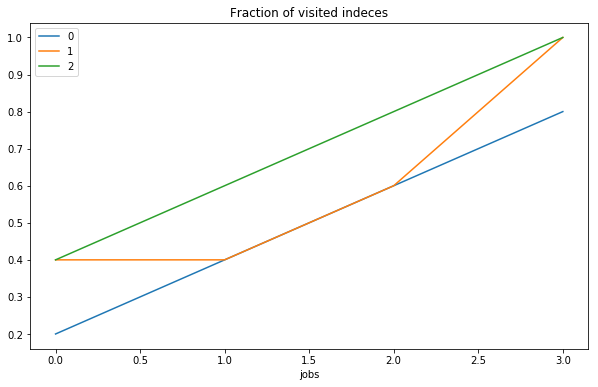

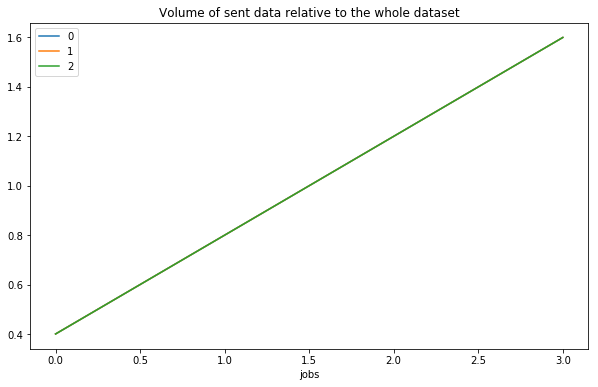

In [9]:
M = 5
size = 4
k = 2

import numpy as np
import pandas as pd
%matplotlib inline

cover_fractions = {}
cover_counts = {}

for rank in range(3): # range(size)
    idx_counts = np.zeros(M)
    cover_fraction = []
    cover_count = []
    for job, tile in enumerate(tiles_generator(k=k, M=M, rank=rank, size=size)):
        for idx in tile:
            idx_counts[idx] += 1
        cover_fraction.append( np.mean(idx_counts.astype('bool')) )
        cover_count.append( np.mean(idx_counts) )
    cover_fractions[rank] = cover_fraction
    cover_counts[rank] = cover_count

min_len_fraction = min([len(cover) for cover in cover_fractions.values()])
trunc_cover_fractions = {rank: cover[:min_len_fraction] for (rank, cover) in cover_fractions.items()}

min_len_count = min([len(cover) for cover in cover_counts.values()])
trunc_cover_counts = {rank: cover[:min_len_count] for (rank, cover) in cover_counts.items()}

pd.DataFrame(trunc_cover_fractions).rename_axis('jobs').plot(figsize=(10,6), title='Fraction of visited indeces')
pd.DataFrame(trunc_cover_counts).rename_axis('jobs').plot(figsize=(10,6), title='Volume of sent data relative to the whole dataset')

In [213]:
seq = madelon[0].values

In [155]:
(seq[sorted(range(len(seq)), key=seq.__getitem__)] == seq[list(np.argsort(seq))]).all()

True

In [156]:
%%timeit
np.argsort(seq)

42.1 µs ± 1.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [157]:
%%timeit
sorted(range(len(seq)), key=seq.__getitem__)

805 µs ± 8.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [164]:
np.argsort(seq)

array([1048, 1335,  722, ..., 1584, 1926,  747])

In [374]:
from scipy.stats import rankdata
np.random.seed(123)

In [27]:
divisions = 10
range_ = 0.1

In [376]:
seq = np.random.randint(1, 15, 25)
seq

array([14,  3, 13,  3,  7,  2,  4, 11, 12, 10,  7,  2,  1,  2, 10,  1,  1,
       10,  4, 14,  5,  1,  1,  5,  2])

In [366]:
rankdata([0,1,1])

array([1. , 2.5, 2.5])

In [363]:
ranks = rankdata(seq)
ranks

array([24.5, 10.5, 23. , 10.5, 16.5,  7.5, 12.5, 21. , 22. , 19. , 16.5,
        7.5,  3. ,  7.5, 19. ,  3. ,  3. , 19. , 12.5, 24.5, 14.5,  3. ,
        3. , 14.5,  7.5])

In [364]:
np.arange(1, divisions)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [365]:
(np.random.random(divisions - 1) - .5)

array([-0.10788248, -0.15682198,  0.22904971, -0.06142776, -0.4403221 ,
       -0.10195574,  0.23799541, -0.31750827, -0.32454824])

In [338]:
range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)

array([0.98147592, 2.02683192, 3.01483504, 3.98061031, 4.99878069,
       5.9953753 , 6.98162431, 8.01571584, 9.01490251])

In [339]:
(range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions

array([0.09591548, 0.19935407, 0.29965439, 0.39896703, 0.49546506,
       0.60405929, 0.70332069, 0.79724223, 0.90314   ])

In [377]:
tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
tresholds

array([ 2.42062293,  4.91886294,  7.50788784, 10.0079569 , 12.53360024,
       15.08735795, 17.55611383, 20.02775588, 22.55561085])

In [345]:
my_zeros = np.zeros(5)
indeces = [False, False, True, False, True]
my_zeros[indeces] += 1
my_zeros

array([0., 0., 1., 0., 1.])

In [386]:
seq = np.random.randint(1, 15, 25)

In [387]:
from scipy.stats import rankdata
np.random.seed(123)
ranks = rankdata(seq)

tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)

discrete_seq = np.zeros(25, dtype='int8')
for treshold in tresholds:
    discrete_seq[ranks > treshold] += 1
discrete_seq

array([8, 1, 1, 8, 3, 9, 5, 1, 1, 5, 2, 6, 3, 3, 5, 6, 3, 5, 7, 9, 1, 6,
       8, 3, 9], dtype=int8)

In [36]:
seed = 123

In [37]:
from scipy.stats import rankdata

def discretize(seq, divisions=divisions, range_=range_, seed=seed):
    np.random.seed(seed)
    ranks = rankdata(seq)
    tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
    discrete_seq = np.zeros(len(seq), dtype='int8')
    for treshold in tresholds:
        discrete_seq[ranks > treshold] += 1
    return discrete_seq


In [433]:
%%timeit
discretize(madelon[1], divisions, range_, 123)
discretize(madelon[9], divisions, range_, 123)

881 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
madelon_val_T = madelon.values.T[:-2]
madelon_val = madelon.values[:,:-2]

In [60]:
discretize_vec = np.vectorize(discretize, signature='(n)->(n)', excluded=['divisions', 'range_', 'seed'])

In [62]:
discretize_vec(madelon_val_T)

(500, 2000)

In [441]:
%%timeit
madelon_val[range(10),:]

13.7 µs ± 100 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [442]:
%%timeit
madelon_val_T[:, range(10)]

13.9 µs ± 81.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [444]:
madelon_val_T[range(10)]

array([[485., 483., 487., ..., 480., 484., 474.],
       [477., 458., 542., ..., 517., 481., 493.],
       [537., 460., 499., ..., 631., 505., 469.],
       ...,
       [476., 479., 478., ..., 476., 477., 479.],
       [475., 485., 480., ..., 493., 510., 481.],
       [473., 469., 477., ..., 466., 472., 473.]])

In [438]:
%%timeit
madelon_val[:,range(10)]

17.9 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [35]:
%%timeit
discretize_vec(madelon_val_T, divisions=divisions, range_=range_, seed=123)

222 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [171]:
seq = madelon[0].values
N = len(seq)
ranks = rankdata(seq, method = 'min')
n_buckets = 10
N / n_buckets

In [169]:
np.ones(len(seq))[ranks // (N)]

array([1., 1., 1., ..., 1., 1., 1.])

In [160]:
seq[np.argsort(seq).reshape(-1, 10)]

array([[462, 463, 463, ..., 464, 464, 464],
       [466, 466, 466, ..., 467, 467, 467],
       [467, 467, 468, ..., 468, 468, 468],
       ...,
       [496, 496, 496, ..., 496, 497, 497],
       [497, 497, 498, ..., 498, 498, 498],
       [498, 499, 499, ..., 500, 501, 503]])

In [447]:
type(madelon_val_T.shape)

tuple

---
27.01

In [68]:
import numpy as np
from scipy.stats import rankdata
from pandas import read_csv
from itertools import chain, starmap

divisions = 10
range_ = 0.1
seed = 123
k = 3
window = 10

def discretize(seq, divisions=divisions, range_=range_, seed=seed):
    np.random.seed(seed)
    ranks = rankdata(seq)
    tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
    discrete_seq = np.zeros(len(seq), dtype='int64')
    for treshold in tresholds:
        discrete_seq[ranks > treshold] += 1
    return discrete_seq

discretize_vec = np.vectorize(discretize, signature='(n)->(n)', excluded=['divisions', 'range_', 'seed'])
file = "madelon.csv"
data = discretize_vec(read_csv(file, dtype='float64', header=None).values.T[:-2])
dim0, dim1 = data.shape

def dummy_job(indeces):
    results = {}
    for index in indeces:
        other_indeces = tuple(set(indeces) - set([index]))
        result = np.sum(data[other_indeces]) - np.sum(data[index])
        results[index] = (result, other_indeces)
    return results

indeces = (0,1,2)
index = 2
other_indeces = list(set(indeces) - set([index]))
other_indeces
np.sum(data[other_indeces]) - np.sum(data[index])

8876

In [44]:
seq = [3,4,1,8,13,8]
ranks = rankdata(seq)
np.random.seed(123)
divisions = 4
tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
tresholds

array([ 1.52947038,  2.9679209 ,  4.45902772])

In [18]:
%%writefile sched0.py
import numpy as np
from scipy.stats import rankdata
from pandas import read_csv
from itertools import chain, starmap
# np.random.seed(123)

from mpi4py import MPI
comm = MPI.COMM_WORLD
comm.Barrier()
time0 = MPI.Wtime()
size = comm.Get_size()
rank = comm.Get_rank()

#tag_idle = 100
tag_results = 101
tag_tile = 102
tag_terminate = 103


divisions = 10
range_ = 0.1
seed = 123
k = 3
#window = 10
# M = (N-1) // window + 1

print(rank, "starting")

def discretize(seq, divisions=divisions, range_=range_, seed=seed):
    '''
    >>> discretize([3, 4, 1, 8, 13, 8], divisions=4, range_=0, seed=123) = array([1, 1, 0, 2, 3, 2])
    where
    ranks = [2., 3., 1., 4.5, 6., 4.5]
    tresholds = [1.5,  3.,  4.5]
    '''
    np.random.seed(seed)
    ranks = rankdata(seq)
    tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
    discrete_seq = np.zeros(len(seq), dtype='int64')
    for treshold in tresholds:
        discrete_seq[ranks > treshold] += 1
    return discrete_seq

discretize_vec = np.vectorize(discretize, signature='(n)->(n)', excluded=['divisions', 'range_', 'seed'])

if rank == 0:
    print(rank, "attempting to read data")
    file = "madelon_tiny.csv"
    data = discretize_vec(read_csv(file, dtype='float64', header=None).values.T[:-2])
    data_shape = data.shape
else:
    data_shape = None    

dim0, dim1 = comm.bcast(data_shape, root=0)
print(rank, "dims:", dim0, dim1)

if rank != 0:
    data = np.empty((dim0, dim1), dtype='int64')

comm.Bcast([data, MPI.INT], root=0)
if rank == 0:
    print("Elapsed:", MPI.Wtime() - time0, "sec")
    
def tiles_generator(k, M, skip_diag=True):
    '''
    Python-generator.
    E.g. output for k=2 and skippig the diagonal elements:
    {0,1}, {0,2}, ..., {0, M-1}, {1,2}, ..., {1,M-1}, ..., {M-2, M-2}
    '''
    sd = int(skip_diag)

    def embedd(*indeces):
        for i in range(indeces[-1] + sd, M):
            yield (*indeces, i)

    indeces = ((idx,) for idx in range(M))
    for _ in range(k - 1):
        indeces = chain.from_iterable(starmap(embedd, indeces))
        
    return indeces

def dummy_job(indeces):
    '''
    Job function. A dummy version.
    Output: {indexA: (number, list-of-indeces), indexB: ..., ...}
    '''
    results = {}
    for index in indeces:
        other_indeces = list(set(indeces) - set([index]))
        result = np.sum(data[other_indeces]) - np.sum(data[index])
        results[index] = (result, other_indeces)
    return results



if rank == 0:
    final_results = {index: (0, None) for index in range(dim0)}
    def record(results):
        '''
        Accepts output of the job function and updates the final_results dict
        '''
        for index, score in results.items():
            if score[0] > final_results[index][0]:
                final_results[index] = score
        
    #for _ in range(size - 1):
    #    next(local_tiles)
    #dummy_queue = [next(local_tiles), next(local_tiles), next(local_tiles), next(local_tiles), next(local_tiles)]
    
    print(rank, "entering for loop")
    status = MPI.Status()
    for tile in tiles_generator(k, dim0):
        results = comm.recv(status=status) # source=MPI.ANY_SOURCE, tag=MPI.ANY_TAG, 
        comm.isend(tile, dest=status.source)
        #print(rank, "received", status.tag, "from", status.source)
        record(results)
    
    print("Elapsed:", MPI.Wtime() - time0, "sec")
    print(rank, "starts terminating workers")
    for _ in range(size - 1):
        last_results = comm.recv(status=status) # source=MPI.ANY_SOURCE, tag=MPI.ANY_TAG
        #print(rank, "received", status.tag, "from", status.source)
        record(last_results)
        comm.isend(None, dest=status.source)
    
    print(rank, "says goodbye")
    print("final_results:", final_results)
        
    
else:
#     for _ in range(rank - 1):
#         next(local_tiles)
#     first_tile = next(local_tiles)
    print(rank, "attempting to send blank_results")
    comm.send({0: (0,)}, dest=0, tag=tag_results)
    print(rank, "entering while loop")
    while True:
        tile = comm.recv(source = 0) # tag=MPI.ANY_TAG
        #print(rank, "received tile", tile)
        if tile:
            results = dummy_job(tile)
        else:
            print(rank, "says goodbye")
            break
        comm.isend(results, dest=0)


# sample = np.zeros(5, dtype='float64')

# if rank == 1:
#     sample = np.ones(5, dtype='float64')
#     comm.Send([sample, MPI.DOUBLE], dest=0, tag=tag_idle)
# elif rank == 0:
#     #for _ in range(1, size):
#     status = MPI.Status()
#     comm.Probe(MPI.ANY_SOURCE, MPI.ANY_TAG, status=status)
#     print(status.tag)
#     print(status.source)
#     print(status.Get_elements(MPI.DOUBLE))
#     comm.Recv(sample, source=status.source)


# if rank == 0:
#     status = MPI.Status()
#     task_queue = range( (dim0 - 1) // window + 1)
#     while(task_queue)
# else:
#     comm.send(None, dest=0, tag=tag_idle)
    
#     request = comm.Irecv(MPI.ANY_SOURCE, 
#     packet = data[task*window: (task+1)*window]
#     comm.Send(data, )


# if rank != 0:
#     data = np.empty(data_shape, dtype=dtype)

# if rank == 0:
#     colsA = [0, 1]
#     colsB = [2, 3]
#     column_bunch = data[:, colsA]
#     comm.Send(column_bunch, dest=1, tag=0)
#     .
# elif rank == 1:
#     column_bunch = np.empty((dim0, 2), dtype=dtype)
#     comm.Recv(column_bunch, source=0, tag=0)

# print(rank, column_bunch)


Overwriting sched0.py


---
28.01

In [121]:
%%writefile sched1.py
import numpy as np
from scipy.stats import rankdata
from pandas import read_csv
from itertools import product, chain, starmap, combinations #, combinations_with_replacement

from mpi4py import MPI
comm = MPI.COMM_WORLD
comm.Barrier()
time0 = MPI.Wtime()
size = comm.Get_size()
rank = comm.Get_rank()

k = 3
window = 50
divisions = 10
range_ = 0.1
seed = 123

print(rank, "starting")

# Read and broadcast the data

def discretize(seq, divisions=divisions, range_=range_, seed=seed):
    '''
    >>> discretize([3, 4, 1, 8, 13, 8], divisions=4, range_=0, seed=123) = array([1, 1, 0, 2, 3, 2])
    where
    ranks = [2., 3., 1., 4.5, 6., 4.5]
    tresholds = [1.5,  3.,  4.5]
    '''
    np.random.seed(seed)
    ranks = rankdata(seq)
    tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
    discrete_seq = np.zeros(len(seq), dtype='float64')
    for treshold in tresholds:
        discrete_seq[ranks > treshold] += 1
    return discrete_seq

discretize_vec = np.vectorize(discretize, signature='(n)->(n)', excluded=['divisions', 'range_', 'seed'])

if rank == 0:
    print(rank, "attempting to read data")
    file = "madelon_tiny.csv"
    data = read_csv(file, dtype='float64', header=None).values.T[:-1]
    data[:-1] = discretize_vec(data[:-1])
    data = data.astype('int64')
    X_shape = data[:-1].shape
else:
    X_shape = None    

dim0, dim1 = comm.bcast(X_shape, root=0)
M = (dim0 - 1) // window + 1
border_cols = range( (M-1) * window, dim0)

if rank != 0:
    data = np.empty((dim0 + 1, dim1), dtype='int64')

comm.Bcast([data, MPI.INT], root=0)
n_classes = len(np.unique(data[-1]))

print(rank, "dims:", dim0, dim1, "tile_index_span:", M, "number of classes:", n_classes)
if rank == 0:
    print("Elapsed:", MPI.Wtime() - time0, "sec")

# Function definitions

def tiles_generator(k=k, M=M, skip_diag=False):
    '''
    Python-generator.
    E.g. output for k=2 and skippig the diagonal elements:
    {0,1}, {0,2}, ..., {0, M-1}, {1,2}, ..., {1,M-1}, ..., {M-2, M-2}
    Equivalent to
    return combinations(range(M), k) if skip_diag else combinations_with_replacement(range(M), k) 
    '''
    sd = int(skip_diag)

    def embedd(*indeces):
        for i in range(indeces[-1] + sd, M):
            yield (*indeces, i)

    indeces = ((idx,) for idx in range(M))
    for _ in range(k - 1):
        indeces = chain.from_iterable(starmap(embedd, indeces))
        
    return indeces


def jobs_generator(tile, window=window, M=M, border_cols=border_cols):
    '''
    Map tile into sequence of fundamental-tiles
    (i.e. elements of the cartesian product of data columns)
    '''
    index_counts = {index: tile.count(index) for index in tile}
    index_to_cols = lambda index: range(index * window, (index + 1) * window) if index != (M - 1) else border_cols 
    cols_tile = (combinations(index_to_cols(index), count) for (index, count) in index_counts.items())
    return (list(chain.from_iterable(col_indeces)) for col_indeces in product(*cols_tile))


def dummy_work(indeces):
    '''
    Work-function. A dummy version.
    Output: {indexA: (number, list-of-indeces), indexB: ..., ...}
    '''
    results = {}
    for index in indeces:
        other_indeces = list(set(indeces) - set([index]))
        result = np.sum(data[other_indeces]) - np.sum(data[index])
        results[index] = (result, other_indeces)
    return results


def record(results, records):
    '''
    results, records -> dicts
    Accepts output of the work-function and updates the dict that accumulates global results
    '''
    for index, score in results.items():
        if index not in records or score[0] > records[index][0]:
            records[index] = score

# Work loops

if rank == 0:
    final_results = {}
    
    print(rank, "entering the for loop")
    status = MPI.Status()
    for tile in tiles_generator(k, M):
        tile_results = comm.recv(status=status)
        record(tile_results, final_results)
        comm.isend(tile, dest=status.source)
    
    print(rank, "starts terminating workers")
    for _ in range(size - 1):
        tile_results = comm.recv(status=status)
        record(tile_results, final_results)
        comm.isend(None, dest=status.source)
    
    print(rank, "says goodbye")
    #print("final_results:", final_results)
    print("Elapsed:", MPI.Wtime() - time0, "sec")
        
    
else:
    print(rank, "attempting to send blank_results")
    comm.send({}, dest=0)
    print(rank, "entering the while loop")
    while True:
        tile = comm.recv(source = 0)
        if tile:
            tile_results = {}
            for job in jobs_generator(tile):
                results = dummy_work(job)
                record(results, tile_results)
            comm.isend(tile_results, dest=0)
        else:
            print(rank, "says goodbye")
            break



Overwriting sched1.py


In [122]:
%%bash
mpirun -n 4 python sched1.py

1 starting
2 starting
3 starting
0 starting
0 attempting to read data
3 dims: 58 2000 tile_index_span: 2
1 dims: 58 2000 tile_index_span: 2
2 dims: 58 2000 tile_index_span: 2
0 dims: 58 2000 tile_index_span: 2
2 attempting to send blank_results
1 attempting to send blank_results
1 entering the while loop
2 entering the while loop
3 attempting to send blank_results
3 entering the while loop
Elapsed: 0.1788331739990099 sec
0 entering the for loop
0 starts terminating workers
3 says goodbye
2 says goodbye
0 says goodbye
Elapsed: 2.8945835390004504 sec
1 says goodbye


In [124]:
import numpy as np
from scipy.stats import rankdata
from pandas import read_csv
from itertools import product, chain, starmap, combinations

k = 3
window = 10
divisions = 10
range_ = 0.1
seed = 123

def discretize(seq, divisions=divisions, range_=range_, seed=seed):
    '''
    >>> discretize([3, 4, 1, 8, 13, 8], divisions=4, range_=0, seed=123) = array([1, 1, 0, 2, 3, 2])
    where
    ranks = [2., 3., 1., 4.5, 6., 4.5]
    tresholds = [1.5,  3.,  4.5]
    '''
    np.random.seed(seed)
    ranks = rankdata(seq)
    tresholds = (range_ * (np.random.random(divisions - 1) - .5) + np.arange(1, divisions)) / divisions * len(seq)
    discrete_seq = np.zeros(len(seq), dtype='float64')
    for treshold in tresholds:
        discrete_seq[ranks > treshold] += 1
    return discrete_seq

discretize_vec = np.vectorize(discretize, signature='(n)->(n)', excluded=['divisions', 'range_', 'seed'])

file = "madelon.csv"
data = read_csv(file, dtype='float64', header=None).values.T[:-1]
data[:-1] = discretize_vec(data[:-1])
data = data.astype('int64')

dim0, dim1 = data[:-1].shape  
M = (dim0 - 1) // window + 1
border_cols = range( (M-1) * window, dim0)

In [125]:
def jobs_generator(tile, window=window, M=M, border_cols=border_cols):
    '''
    Map tile into sequence of fundamental-tiles
    (i.e. elements of the cartesian product of data columns)
    '''
    index_counts = {index: tile.count(index) for index in tile}
    index_to_cols = lambda index: range(index * window, (index + 1) * window) if index != (M - 1) else border_cols 
    cols_tile = (combinations(index_to_cols(index), count) for (index, count) in index_counts.items())
    return (chain(*col_indeces) for col_indeces in product(*cols_tile))

In [126]:
data[0]

array([6, 5, 7, ..., 3, 6, 1])

In [127]:
data[10]

array([1, 0, 3, ..., 8, 8, 2])

In [128]:
data[20]

array([9, 2, 1, ..., 8, 2, 5])

In [129]:
data[list(list(jobs_generator((0,1,2)))[0])]

array([[6, 5, 7, ..., 3, 6, 1],
       [1, 0, 3, ..., 8, 8, 2],
       [9, 2, 1, ..., 8, 2, 5]])

In [130]:
n_classes = len(np.unique(data[-1]))

In [131]:
n_classes

2

In [132]:
data[-2]

array([5, 8, 6, ..., 3, 4, 8])

In [134]:
indeces = [0,1,2]
data[[-1] + indeces]

array([[0, 0, 0, ..., 0, 1, 1],
       [6, 5, 7, ..., 3, 6, 1],
       [4, 1, 9, ..., 8, 4, 6],
       [7, 0, 3, ..., 9, 4, 1]])

In [135]:
divisions, k

(10, 3)

In [136]:
contingency_m = np.zeros([n_classes] + [divisions] * k)

In [138]:
contingency_m.shape

(2, 10, 10, 10)

In [139]:
for idx in data[[-1] + indeces].T:
    #print(tuple(idx))
    contingency_m[tuple(idx)] += 1

In [140]:
contingency_m

array([[[[ 2.,  1.,  1., ...,  2.,  1.,  0.],
         [ 0.,  0.,  1., ...,  0.,  1.,  3.],
         [ 2.,  0.,  2., ...,  3.,  1.,  1.],
         ..., 
         [ 1.,  1.,  0., ...,  1.,  2.,  1.],
         [ 0.,  0.,  0., ...,  1.,  2.,  1.],
         [ 2.,  1.,  0., ...,  0.,  1.,  1.]],

        [[ 1.,  2.,  0., ...,  4.,  2.,  2.],
         [ 0.,  1.,  0., ...,  3.,  0.,  0.],
         [ 0.,  2.,  1., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  4.,  0., ...,  0.,  1.,  1.],
         [ 0.,  0.,  1., ...,  1.,  1.,  2.],
         [ 2.,  1.,  1., ...,  2.,  0.,  0.]],

        [[ 1.,  2.,  0., ...,  1.,  3.,  2.],
         [ 1.,  1.,  1., ...,  3.,  1.,  1.],
         [ 0.,  2.,  1., ...,  1.,  0.,  0.],
         ..., 
         [ 0.,  2.,  1., ...,  3.,  2.,  0.],
         [ 1.,  2.,  1., ...,  2.,  0.,  1.],
         [ 1.,  0.,  0., ...,  0.,  1.,  0.]],

        ..., 
        [[ 2.,  0.,  2., ...,  0.,  2.,  0.],
         [ 1.,  1.,  0., ...,  1.,  1.,  2.],
         [ 1., 

In [143]:
np.sum(contingency_m, axis=0).shape

(10, 10, 10)

In [148]:
info = np.vectorize(lambda p: p * np.log(p + 1E-5))

In [149]:
info(contingency_m)

array([[[[  1.38630436e+00,   9.99995000e-06,   9.99995000e-06, ...,
            1.38630436e+00,   9.99995000e-06,  -0.00000000e+00],
         [ -0.00000000e+00,  -0.00000000e+00,   9.99995000e-06, ...,
           -0.00000000e+00,   9.99995000e-06,   3.29584687e+00],
         [  1.38630436e+00,  -0.00000000e+00,   1.38630436e+00, ...,
            3.29584687e+00,   9.99995000e-06,   9.99995000e-06],
         ..., 
         [  9.99995000e-06,   9.99995000e-06,  -0.00000000e+00, ...,
            9.99995000e-06,   1.38630436e+00,   9.99995000e-06],
         [ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00, ...,
            9.99995000e-06,   1.38630436e+00,   9.99995000e-06],
         [  1.38630436e+00,   9.99995000e-06,  -0.00000000e+00, ...,
           -0.00000000e+00,   9.99995000e-06,   9.99995000e-06]],

        [[  9.99995000e-06,   1.38630436e+00,  -0.00000000e+00, ...,
            5.54518744e+00,   1.38630436e+00,   1.38630436e+00],
         [ -0.00000000e+00,   9.99995000e-06,

In [ ]:
def dummy_work(indeces, n_classes=n_classes):
    '''
    Work-function.
    Output: {indexA: (number, list-of-indeces), indexB: ..., ...}
    '''
    results = {}
    contingency_m = np.zeros([n_classes] + [divisions] * k)
    for i, index in enumerate(indeces):
        
        other_indeces = list(set(indeces) - set([index]))
        result = np.sum(data[other_indeces]) - np.sum(data[index])
        results[index] = (result, other_indeces)
    return results